<a href="https://colab.research.google.com/github/FrancoPalavicinoG/cellia/blob/main/notebooks/10_EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup Kaggle API

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

### Download `cardiovascular-disease-dataset` from Kaggle

In [ ]:
!kaggle datasets download -d sulianova/cardiovascular-disease-dataset
!unzip -o cardiovascular-disease-dataset.zip -d cardio_dataset

### Cardio diasease dataset into pandas DF

Import libraries

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Create Dataframes

In [16]:
df = pd.read_csv('cardio_dataset/cardio_train.csv', sep=';')

### Basic EDA

In [17]:
def basic_eda(df, name, n=3):
    print(f"\n===== {name} =====")
    print("Shape:", df.shape)
    print("Columns:", list(df.columns))
    print("\nData type:")
    print(df.dtypes.value_counts())
    print("\nNull per column (top 5):")
    print(df.isna().sum().sort_values(ascending=False).head())
    print("\nCount all nulls")
    print(df.isnull().sum().sum())
    print("\nData examples:")
    display(df.head(n))


Features

- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code |
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |



In [18]:
basic_eda(df, "Cardio Disease")


===== Cardio Disease =====
Shape: (70000, 13)
Columns: ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

Data type:
int64      12
float64     1
Name: count, dtype: int64

Null per column (top 5):
id        0
age       0
gender    0
height    0
weight    0
dtype: int64

Count all nulls
0

Data examples:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [23]:
def null_summary(df, name):
    nulls = df.isnull().sum()
    total = len(df)
    summary = pd.DataFrame({
        "Column": nulls.index,
        "Nulls": nulls.values,
        "Percent": (nulls.values / total * 100).round(2)
    })
    print(f"\nDataset: {name}")
    display(summary)

In [24]:
null_summary(df, "Cardio Disease")


Dataset: Cardio Disease


,Column,Nulls,Percent
0,id,0,0.0
1,age,0,0.0
2,gender,0,0.0
3,height,0,0.0
4,weight,0,0.0
5,ap_hi,0,0.0
6,ap_lo,0,0.0
7,cholesterol,0,0.0
8,gluc,0,0.0
9,smoke,0,0.0


### DF examples

In [25]:
def data_example(df, name, n=5):
    print(f"\n{name} – Data examples:")
    display(df.head(n))

In [26]:
data_example(df, "Cardio Disease")


Cardio Disease – Data examples:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


###  Target Variable distribution

===== COUNT =====
cardio
0    35021
1    34979
Name: count, dtype: int64

===== PROPORTIONS =====
cardio
0    0.5003
1    0.4997
Name: proportion, dtype: float64



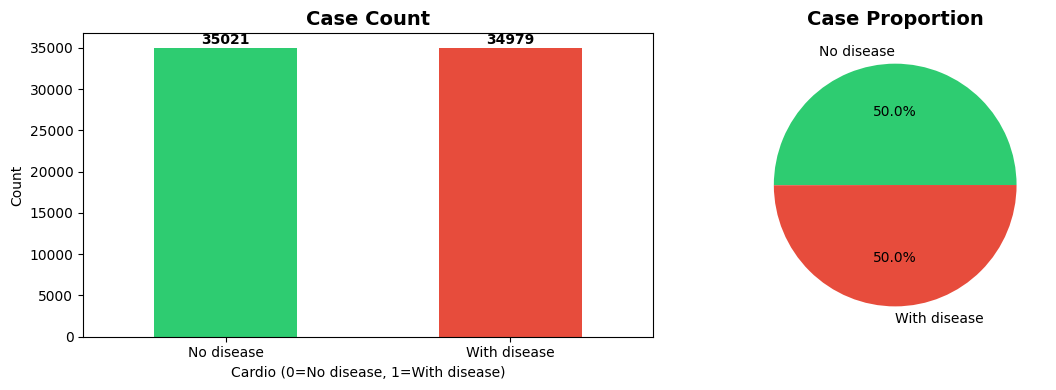

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count
print("===== COUNT =====")
print(df['cardio'].value_counts())
print()

# Proportions
print("===== PROPORTIONS =====")
print(df['cardio'].value_counts(normalize=True))
print()

# Visualization - Bar chart
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Count plot
df['cardio'].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Case Count', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Cardio (0=No disease, 1=With disease)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['No disease', 'With disease'], rotation=0)

# Add values on top of bars
for i, v in enumerate(df['cardio'].value_counts().values):
    axes[0].text(i, v + 500, str(v), ha='center', fontweight='bold')

# Pie chart
df['cardio'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                                  labels=['No disease', 'With disease'],
                                  colors=['#2ecc71', '#e74c3c'])
axes[1].set_title('Case Proportion', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

### Save our DF in Google Drive

Mount Drive

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Save DF to excel format

In [32]:
output_path = "/content/drive/MyDrive/cellia_drive/Datasets/"

df.to_excel(output_path + "cardio_disease.xlsx", index=False)
print("✅ File saved in:", output_path)

✅ File saved in: /content/drive/MyDrive/cellia_drive/Datasets/
